In [2]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100

from matplotlib import pyplot as plt
import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
import pylab as plot
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss,accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.formula.api as sm

In [3]:
from xgboost import XGBClassifier
import xgboost as xgb

In [4]:
#for scaling
from sklearn.preprocessing import StandardScaler

Importing training dataset

In [5]:
data = pd.read_csv('./train.csv')

In [6]:
print(data.shape)

(867873, 10)


In [7]:
data.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Id'],
      dtype='object')

Splitting the "Dates" into date and time

In [8]:
tc=data.corr()

In [9]:
tc

,X,Y,Id
X,1.000000,0.561559,0.004072
Y,0.561559,1.000000,0.008923
Id,0.004072,0.008923,1.000000


In [10]:
df=data
#df.head(100000)
datetime=df.Dates.str.split(pat=" ",expand=True)
datetime.columns=['Date','Time']
#datetime

In [11]:
Date=datetime.Date.str.split(pat="-",expand=True)
Date.columns=['Year','Month','Day']

Time=datetime.Time.str.split(pat=":",expand=True)
Time.columns=['Hour','Minute','Second']

Dropping the column of "Dates" and appending the dataframe "datetime"

In [12]:
df=pd.concat([df,Date,Time],axis=1)
#df

In [13]:
df=df.drop(labels=['Dates'],axis=1)

# #Encoding

In [14]:
df.columns

Index(['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution',
       'Address', 'X', 'Y', 'Id', 'Year', 'Month', 'Day', 'Hour', 'Minute',
       'Second'],
      dtype='object')

LabelEncoding of "DayOfWeek" and "PdDistrict"

In [15]:
le = preprocessing.LabelEncoder()

In [16]:
y=pd.get_dummies(df.Category,columns=['Category'],prefix=" ",prefix_sep=" ",drop_first=True,)



# Rotation 45 degree

In [17]:
"""df['Y']=df['Y'].apply(lambda x : x if 37.82 > x else 37.82)
df['X']=df['X'].apply(lambda x : x if -122.3 > x else 122.3)"""

"df['Y']=df['Y'].apply(lambda x : x if 37.82 > x else 37.82)\ndf['X']=df['X'].apply(lambda x : x if -122.3 > x else 122.3)"

In [18]:
"""df["rot45_X"]=0.707 * df["Y"] + 0.707 * df["X"]
df["rot45_Y"]=0.707 * df["Y"] - 0.707 * df["X"]"""

'df["rot45_X"]=0.707 * df["Y"] + 0.707 * df["X"]\ndf["rot45_Y"]=0.707 * df["Y"] - 0.707 * df["X"]'

In [19]:
"""df["radial45"]=np.sqrt(np.power(df['rot45_X'],2) + np.power(df['rot45_Y'],2))"""

'df["radial45"]=np.sqrt(np.power(df[\'rot45_X\'],2) + np.power(df[\'rot45_Y\'],2))'

# Rotation 30 degree

In [20]:
"""df["rot30_X"]=(1.732/2) * df["Y"] + 0.5 * df["X"]
df["rot30_Y"]=(1.732/2) * df["Y"] - 0.5 * df["X"]
"""

'df["rot30_X"]=(1.732/2) * df["Y"] + 0.5 * df["X"]\ndf["rot30_Y"]=(1.732/2) * df["Y"] - 0.5 * df["X"]\n'

In [21]:
"""df["radial30"]=np.sqrt(np.power(df['rot30_X'],2) + np.power(df['rot30_Y'],2))"""

'df["radial30"]=np.sqrt(np.power(df[\'rot30_X\'],2) + np.power(df[\'rot30_Y\'],2))'

# Rotation 60 degress

In [22]:
"""df["rot60_X"]=(0.5) * df["Y"] + (1.732/2) * df["X"]
df["rot60_Y"]=0.5 * df["Y"] - (1.732/2) * df["X"]
"""

'df["rot60_X"]=(0.5) * df["Y"] + (1.732/2) * df["X"]\ndf["rot60_Y"]=0.5 * df["Y"] - (1.732/2) * df["X"]\n'

In [23]:
"""df["radial60"]=np.sqrt(np.power(df['rot60_X'],2) + np.power(df['rot60_Y'],2))"""

'df["radial60"]=np.sqrt(np.power(df[\'rot60_X\'],2) + np.power(df[\'rot60_Y\'],2))'

# Hours clubbing

In [24]:
df['Hour']=df['Hour'].apply(lambda x:int(x))
#df['Hour']=df['Hour'].apply(lambda x : 'EARLY_Morning' if (x >= 1) and (x <=5) else ('MORNING' if x >= 6 and x <=11 else ('DAY' if x>=12 and x<=18 else 'Night')))
df['Hour']=df['Hour'].apply(lambda x : 'EARLY_MORNING' if x in (1,2,3,4,5) else ('MORNING' if x in (6,7,8,9,10,11) else ('DAY' if x in (12,13,14,15,16,17,18) else 'NIGHT')))

# Month Clubbing

In [25]:
df['Month']=df['Month'].apply(lambda x:int(x))
df['Month']=df['Month'].apply(lambda x : 'MonthLow' if x== 12 else ('MonthMed' if x in (2,6,7,8,9,11) else 'MonthHigh'))

# Minute Clubbing 

In [26]:
df['Minute']=df['Minute'].apply(lambda x:int(x))
df['Minute']=df['Minute'].apply(lambda x : 'low' if x <31 else 'high')

In [27]:
df.head()

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Id,Year,Month,Day,Hour,Minute,Second
0,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,MISSION,NONE,2100 Block of MISSION ST,-122.419331,37.762264,141546,2013,MonthMed,28,DAY,high,00
1,LIQUOR LAWS,CONSUMING ALCOHOL IN PUBLIC VIEW,Thursday,SOUTHERN,"ARREST, BOOKED",1000 Block of MARKET ST,-122.411340,37.781271,794152,2004,MonthMed,19,EARLY_MORNING,high,00
2,FRAUD,"CREDIT CARD, THEFT BY USE OF",Wednesday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421,531205,2007,MonthMed,14,NIGHT,low,00
3,ROBBERY,ROBBERY OF A CHAIN STORE WITH A GUN,Thursday,BAYVIEW,DISTRICT ATTORNEY REFUSES TO PROSECUTE,2400 Block of SAN BRUNO AV,-122.404715,37.730161,523137,2007,MonthLow,27,DAY,low,00
4,OTHER OFFENSES,PROBATION VIOLATION,Sunday,SOUTHERN,"ARREST, BOOKED",4TH ST / STEVENSON ST,-122.405239,37.785265,200968,2012,MonthMed,09,DAY,low,00


# Address splitting

In [28]:
df['Intersection']=df['Address'].apply(lambda x : 1 if '/' in x else 0)
df['Block']=df['Address'].apply(lambda x : 1 if 'Block' in x else 0)
#df['StreetSuffix']=df['Address'].apply(lambda x : x.split(' ')[-1] if len(x.split(' ')[-1])==2 else 0) 

In [29]:
address=pd.DataFrame(df['Address'],columns=['Address'])
address=address.Address.str.split(pat=" /",expand=True )

address.columns=['Address','Intr2']

address=address.Address.str.split(pat=" /",expand=True )
address.columns=['Address']

In [30]:
address.head()

,Address
0,2100 Block of MISSION ST
1,1000 Block of MARKET ST
2,800 Block of BRYANT ST
3,2400 Block of SAN BRUNO AV
4,4TH ST


In [31]:
string=address.iloc[:,0]
string=string.str.strip()

In [32]:
address_fram=string.to_frame()
temp=address_fram['Address'].astype(str).str[-2:]

In [33]:
temp.unique()

array(['ST', 'AV', 'LN', 'DR', 'BL', 'HY', 'CT', 'RD', 'PL', 'PZ', '80',
       'TR', 'WY', 'AL', 'AY', 'ER', 'MS', 'CR', 'TI', 'WK', 'AR', 'EX',
       'NO', 'RK', 'RW'], dtype=object)

In [34]:
address=temp.to_frame()

("ST","AV","LN","DR","BL","HY","CT","RD","PL","PZ","TR","AL","CR","WK","EX","RW")

In [35]:
address['Address']=address['Address'].apply(lambda x :( x if x in ("ST","AV","LN","DR","BL","HY","CT","RD","PL","PZ","TR","AL","CR","WK","EX","RW") else (("I-80" if x in ("80") else ("HWY" if x in ("WY") else ("WAY" if x in ("AY") else ("TER" if x in ("ER") else ("ALMS" if x in ("MS") else ("MAR" if x in ("AR") else ("PARK" if x in ("RK") else ("STWY" if x in ("WY") else ("VIA" if x in ("NO") else ("BLOCK")))))))))))))

In [36]:
#address.to_csv("Address.csv", float_format = '%.5F')

In [37]:
df=df.drop(labels=['Address'],axis=1)

Concatenating "df" and "address"

In [38]:
df=pd.concat([address,df],axis=1)

In [39]:
Id=df['Id']
df=df.drop(['Descript','Resolution','Id','Second'],axis=1)

In [40]:
df.head()

,Address,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Day,Hour,Minute,Intersection,Block
0,ST,SEX OFFENSES FORCIBLE,Friday,MISSION,-122.419331,37.762264,2013,MonthMed,28,DAY,high,0,1
1,ST,LIQUOR LAWS,Thursday,SOUTHERN,-122.411340,37.781271,2004,MonthMed,19,EARLY_MORNING,high,0,1
2,ST,FRAUD,Wednesday,SOUTHERN,-122.403405,37.775421,2007,MonthMed,14,NIGHT,low,0,1
3,AV,ROBBERY,Thursday,BAYVIEW,-122.404715,37.730161,2007,MonthLow,27,DAY,low,0,1
4,ST,OTHER OFFENSES,Sunday,SOUTHERN,-122.405239,37.785265,2012,MonthMed,09,DAY,low,1,0


Label Encoded Columns :PdDistrict ,Address ,X ,Y

In [41]:
df.head()

,Address,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Day,Hour,Minute,Intersection,Block
0,ST,SEX OFFENSES FORCIBLE,Friday,MISSION,-122.419331,37.762264,2013,MonthMed,28,DAY,high,0,1
1,ST,LIQUOR LAWS,Thursday,SOUTHERN,-122.411340,37.781271,2004,MonthMed,19,EARLY_MORNING,high,0,1
2,ST,FRAUD,Wednesday,SOUTHERN,-122.403405,37.775421,2007,MonthMed,14,NIGHT,low,0,1
3,AV,ROBBERY,Thursday,BAYVIEW,-122.404715,37.730161,2007,MonthLow,27,DAY,low,0,1
4,ST,OTHER OFFENSES,Sunday,SOUTHERN,-122.405239,37.785265,2012,MonthMed,09,DAY,low,1,0


In [42]:
data['PdDistrict'].unique()

array(['MISSION', 'SOUTHERN', 'BAYVIEW', 'CENTRAL', 'INGLESIDE',
       'NORTHERN', 'RICHMOND', 'TARAVAL', 'TENDERLOIN', 'PARK'],
      dtype=object)

# Label Encoding

In [43]:
le = preprocessing.LabelEncoder()

"DayOf Week"

df.columns

In [44]:
le_res=le.fit_transform(df['DayOfWeek'])
Day=pd.DataFrame(le_res)
Day.columns=['DayOfWeek']
df=df.drop(labels=['DayOfWeek'],axis=1)
df=pd.concat([Day,df],axis=1)

df.columns


Index(['DayOfWeek', 'Address', 'Category', 'PdDistrict', 'X', 'Y', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Intersection', 'Block'],
      dtype='object')

In [45]:

df.columns

Index(['DayOfWeek', 'Address', 'Category', 'PdDistrict', 'X', 'Y', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'Intersection', 'Block'],
      dtype='object')

"PdDistrict"

In [46]:

#le = preprocessing.LabelEncoder()
le_res=le.fit_transform(df['PdDistrict'])
District=pd.DataFrame(le_res)

#District=pd.get_dummies(df['PdDistrict'],drop_first=True)
District.columns=['District']
df=df.drop(labels=['PdDistrict'],axis=1)
df=pd.concat([District,df],axis=1)


"Address"

In [47]:

le_res=le.fit_transform(df['Address'])
Address=pd.DataFrame(le_res)
Address.columns=['Address']
df=df.drop(labels=['Address'],axis=1)
df=pd.concat([Address,df],axis=1)


"Year"

In [48]:

#le = preprocessing.LabelEncoder()
le_res=le.fit_transform(df['Year'])
Year=pd.DataFrame(le_res)

#District=pd.get_dummies(df['PdDistrict'],drop_first=True)
Year.columns=['Year']
df=df.drop(labels=['Year'],axis=1)
df=pd.concat([Year,df],axis=1)


Month

In [49]:

#le = preprocessing.LabelEncoder()
le_res=le.fit_transform(df['Month'])
Month=pd.DataFrame(le_res)

#District=pd.get_dummies(df['PdDistrict'],drop_first=True)
Month.columns=['Month']
df=df.drop(labels=['Month'],axis=1)
df=pd.concat([Month,df],axis=1)



"Day"

In [50]:

#le = preprocessing.LabelEncoder()
le_res=le.fit_transform(df['Day'])
Day=pd.DataFrame(le_res)

#District=pd.get_dummies(df['PdDistrict'],drop_first=True)
Day.columns=['Day']
df=df.drop(labels=['Day'],axis=1)
df=pd.concat([Day,df],axis=1)



"Hour"

In [51]:

#le = preprocessing.LabelEncoder()
le_res=le.fit_transform(df['Hour'])
Hour=pd.DataFrame(le_res)

#District=pd.get_dummies(df['PdDistrict'],drop_first=True)
Hour.columns=['Hour']
df=df.drop(labels=['Hour'],axis=1)
df=pd.concat([Hour,df],axis=1)



"Minute"

In [52]:

#le = preprocessing.LabelEncoder()
le_res=le.fit_transform(df['Minute'])
Minute=pd.DataFrame(le_res)

#District=pd.get_dummies(df['PdDistrict'],drop_first=True)
Minute.columns=['Minute']
df=df.drop(labels=['Minute'],axis=1)
df=pd.concat([Minute,df],axis=1)


In [53]:
df.shape

(867873, 13)

In [54]:
le_res=le.fit_transform(df['Minute'])
Minute=pd.DataFrame(le_res)

#District=pd.get_dummies(df['PdDistrict'],drop_first=True)
Minute.columns=['Minute']
df=df.drop(labels=['Minute'],axis=1)
df=pd.concat([Minute,df],axis=1)


In [55]:
le_res=le.fit_transform(df['Category'])
cat=pd.DataFrame(le_res)
cat.columns=['Category']
df=df.drop(labels=['Category'],axis=1)
df=pd.concat([cat,df],axis=1)

df.columns

Index(['Category', 'Minute', 'Hour', 'Day', 'Month', 'Year', 'Address',
       'District', 'DayOfWeek', 'X', 'Y', 'Intersection', 'Block'],
      dtype='object')

In [56]:
df['Address'].nunique()

25

In [57]:
AA=df.corr()

In [58]:
AA

,Category,Minute,Hour,Day,Month,Year,Address,District,DayOfWeek,X,Y,Intersection,Block
Category,1.000000,0.014525,0.028366,0.000355,-0.000327,-0.016826,-0.029475,-0.039450,0.000569,-0.023767,-0.000202,0.069927,-0.069927
Minute,0.014525,1.000000,0.018629,-0.005300,0.003814,-0.019751,-0.022238,-0.022235,-0.015231,-0.040245,0.000173,-0.037279,0.037279
Hour,0.028366,0.018629,1.000000,-0.004570,0.002482,0.000059,0.005050,-0.017758,-0.014743,-0.004253,-0.000552,0.030683,-0.030683
Day,0.000355,-0.005300,-0.004570,1.000000,0.013111,-0.009674,0.002744,-0.002087,-0.004496,0.002511,0.001807,0.008004,-0.008004
Month,-0.000327,0.003814,0.002482,0.013111,1.000000,-0.029777,0.007658,0.000933,-0.006900,0.004868,0.000854,0.005237,-0.005237
Year,-0.016826,-0.019751,0.000059,-0.009674,-0.029777,1.000000,0.007029,0.006893,-0.007759,-0.004199,-0.009222,-0.027507,0.027507
Address,-0.029475,-0.022238,0.005050,0.002744,0.007658,0.007029,1.000000,0.080614,-0.001083,0.257348,0.018865,0.055232,-0.055232
District,-0.039450,-0.022235,-0.017758,-0.002087,0.000933,0.006893,0.080614,1.000000,0.009551,-0.267439,0.016676,-0.020129,0.020129
DayOfWeek,0.000569,-0.015231,-0.014743,-0.004496,-0.006900,-0.007759,-0.001083,0.009551,1.000000,-0.000214,0.000057,0.001959,-0.001959
X,-0.023767,-0.040245,-0.004253,0.002511,0.004868,-0.004199,0.257348,-0.267439,-0.000214,1.000000,0.561559,0.039483,-0.039483


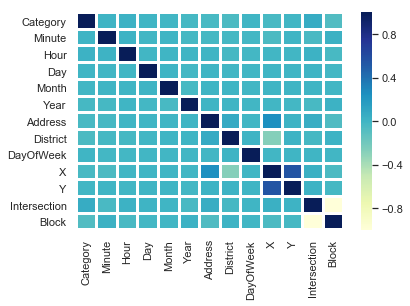

In [69]:
sns.heatmap(AA,linewidths=2, cmap="YlGnBu")

# One Hot Encoding

In [47]:
df=pd.get_dummies(df,columns=['Address', 'DayOfWeek', 'PdDistrict','Year','Month','Day','Hour','Minute'],drop_first=True)

In [48]:
df.shape

(867873, 98)

In [49]:
df.head()

,X,Y,rot45_X,rot45_Y,radial45,rot30_X,rot30_Y,radial30,rot60_X,rot60_Y,radial60,Address_ALMS,Address_AV,Address_BL,Address_BLOCK,Address_CR,Address_CT,Address_DR,Address_EX,Address_HWY,Address_HY,Address_I-80,Address_LN,Address_MAR,Address_PARK,Address_PL,Address_PZ,Address_RD,Address_RW,Address_ST,Address_TER,Address_TR,Address_VIA,Address_WAY,Address_WK,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Month_MonthLow,Month_MonthMed,Day_02,Day_03,Day_04,Day_05,Day_06,Day_07,Day_08,Day_09,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Hour_EARLY_MORNING,Hour_MORNING,Hour_NIGHT,Minute_low
0,-122.419331,37.762264,-59.852546,113.248388,128.091860,-28.507545,93.911786,98.143282,-87.134009,124.896273,152.287276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,-122.411340,37.781271,-59.833459,113.256175,128.089828,-28.487089,93.924250,98.149269,-87.117585,124.898855,152.279998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,-122.403405,37.775421,-59.831985,113.246430,128.080522,-28.488188,93.915217,98.140944,-87.113638,124.889059,152.269705,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,-122.404715,37.730161,-59.864910,113.215357,128.068437,-28.528038,93.876677,98.115643,-87.137403,124.867564,152.265674,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,-122.405239,37.785265,-59.826321,113.254686,128.085177,-28.480580,93.924659,98.147771,-87.110304,124.895569,152.273137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
tc=df.corr()

In [51]:
tc

,X,Y,rot45_X,rot45_Y,radial45,rot30_X,rot30_Y,radial30,rot60_X,rot60_Y,radial60,Address_ALMS,Address_AV,Address_BL,Address_BLOCK,Address_CR,Address_CT,Address_DR,Address_EX,Address_HWY,Address_HY,Address_I-80,Address_LN,Address_MAR,Address_PARK,Address_PL,Address_PZ,Address_RD,Address_RW,Address_ST,Address_TER,Address_TR,Address_VIA,Address_WAY,Address_WK,DayOfWeek_Monday,DayOfWeek_Saturday,DayOfWeek_Sunday,DayOfWeek_Thursday,DayOfWeek_Tuesday,DayOfWeek_Wednesday,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Month_MonthLow,Month_MonthMed,Day_02,Day_03,Day_04,Day_05,Day_06,Day_07,Day_08,Day_09,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Hour_EARLY_MORNING,Hour_MORNING,Hour_NIGHT,Minute_low
X,1.000000,0.021064,0.999937,-0.999937,-0.048258,0.999811,-0.999811,-0.029097,0.999979,-0.999979,-0.052846,0.038350,-0.003823,-0.001673,-0.000005,-0.000076,0.004630,-0.001375,0.000046,0.000049,0.011247,0.013849,-0.000013,-0.000213,-0.000024,0.006556,-0.000257,0.000543,-0.000020,0.000296,-0.000155,-0.000528,-0.000009,-0.000390,-0.000041,0.000586,-0.001281,-0.001084,0.000522,0.000510,0.000430,0.001334,-0.001812,-0.002492,0.000931,-0.003579,-0.003022,0.002429,-0.007708,0.005479,0.004374,0.015620,-0.002592,-0.002476,-0.002538,-0.002528,-0.002404,-0.002493,-0.002657,-0.002721,-0.002702,-0.001622,-0.000484,0.000735,-0.000049,0.001329,-0.000194,-0.000216,0.001259,-0.000194,-0.000207,0.000565,-0.001625,-0.000812,-0.001577,-0.000103,-0.000103,-0.000892,-0.001593,0.000594,0.000500,-0.000947,-0.001650,0.000504,-0.000206,0.002019,0.002899,0.003006,-0.001541,-0.000046,0.001453,-0.000836,0.001487,-0.001162,-0.000020,0.000373,-0.000235,-0.000075
Y,0.021064,1.000000,0.032294,-0.009826,0.140110,0.040506,-0.001598,0.593683,0.027549,-0.014576,-0.057170,0.021940,-0.348245,-0.064830,0.003304,-0.027685,-0.061371,-0.124747,-0.005377,-0.083848,0.037746,0.033311,-0.034809,0.004124,0.000377,0.015880,0.027787,-0.094347,0.001219,0.404148,0.000235,-0.015343,0.003431,-0.026343,-0.000238,-0.006561,0.014287,0.002835,-0.000403,-0.005714,-0.005672,0.389152,-0.526317,-0.116471,0.295532,0.032830,0.126981,0.248832,-0.346583,0.222400,-0.013430,-0.009737,-0.006621,0.000309,0.003798,0.004389,-0.001355,-0.000913,0.001055,0.005616,0.017591,0.010952,0.000651,0.005096,-0.000739,-0.002672,-0.001589,-0.001157,0.003010,0.000518,0.000148,-0.001989,-0.000721,0.000801,0.001667,0.002733,-0.001676,-0.001349,0.001609,-0.000572,0.000380,0.000748,-0.002545,-0.001172,-0.001796,0.000002,0.002281,0.001784,0.003443,-0.000202,0.001546,0.003028,0.000244,-0.000964,0.025653,-0.017208,-0.005725,-0.006151
rot45_X,0.999937,0.032294,1.000000,-0.999747,-0.046669,0.999966,-0.999529,-0.022418,0.999989,-0.999843,-0.053473,0.038585,-0.007735,-0.002401,0.000032,-0.000387,0.003939,-0.002777,-0.000015,-0.000893,0.011668,0.014219,-0.000404,-0.000167,-0.000019,0.006732,0.000055,-0.000517,-0.000006,0.004837,-0.000152,-0.000700,0.000030,-0.000685,-0.000044,0.000513,-0.001120,-0.001052,0.000518,0.000446,0.000366,0.005707,-0.007725,-0.003800,0.004252,-0.003209,-0.001594,0.005224,-0.011600,0.007976,0.004221,0.015506,-0.002666,-0.002472,-0.002495,-0.002478,-0.002418,-0.002503,-0.002644,-0.002657,-0.002504,-0.001498,-0.000477,0.000792,-0.000057,0.001298,-0.000212,-0.000228,0.001293,-0.000189,-0.000205,0.000543,-0.001632,-0.000802,-0.001558,-0.000073,-0.000121,-0.000906,-0.001574,0.000587,0.000504,-0.000938,-0.001678,0.000490,-0.000226,0.002018,0.002924,0.003025,-0.001502,-0.000048,0.001469,-0.000802,0.001489,-0.001172,0.000269,0.000180,-0.000299,-0.000144
rot45_Y,-0.999937,-0.009826,-0.999747,1.000000,0.049841,-0.999529,0.999966,0.035776,-0.999843,0.999989,0.052213,-0.038

# Feature Scaling(Not used YET)

In [29]:

scaler=StandardScaler(copy=True, with_mean=True, with_std=True)
lt_res=scaler.fit_transform([df['X']])
Longitude=pd.DataFrame(lt_res,)



36 Crime Category are there 

# Applying different Models

In [120]:
#Independent Column
X=df
X.shape

(867873, 13)

In [121]:
#Dependent column
y.shape

(867873, 35)

In [122]:
#splitting the dataset into the training set and test set
#from sklearn import model_selection as ms

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=0)

In [32]:
"""from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_tranform(X_train)
X_test=sc_X.transform(X_test)"""

'from sklearn.preprocessing import StandardScaler\nsc_X=StandardScaler()\nX_train=sc_X.fit_tranform(X_train)\nX_test=sc_X.transform(X_test)'

In [123]:
regressor_OLS=sm.OLS(endog=y_train,exog=X_train).fit()

In [124]:
regressor_OLS.summary()

ValueError: shapes (581474,35) and (581474,35) not aligned: 35 (dim 1) != 581474 (dim 0)

# XGBoost Model

In [60]:
X.head()

,Category,Minute,Hour,Day,Month,Year,Address,District,DayOfWeek,X,Y,Intersection,Block
0,27,0,0,27,2,10,19,3,0,-122.419331,37.762264,0,1
1,17,0,1,18,2,1,19,7,4,-122.411340,37.781271,0,1
2,13,1,3,13,2,4,19,7,6,-122.403405,37.775421,0,1
3,24,1,0,26,1,4,2,0,4,-122.404715,37.730161,0,1
4,21,1,0,8,2,9,19,7,3,-122.405239,37.785265,1,0


In [ ]:
model = xgb.XGBClassifier(objective='multi:softprob')
model.fit(X_train, y_train)

C:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
y_pred=model.predict_proba(X_test)

In [110]:
print (log_loss(y_test,y_pred));

2.4825743596979577


Early Stopping in XGBoost

In [37]:
model = XGBClassifier(objective='multi:softprob')
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="mlogloss", eval_set=eval_set, verbose=True)

C:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\anaconda\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-mlogloss:3.42722
Will train until validation_0-mlogloss hasn't improved in 10 rounds.
[1]	validation_0-mlogloss:3.31607
[2]	validation_0-mlogloss:3.22979
[3]	validation_0-mlogloss:3.15756
[4]	validation_0-mlogloss:3.0969
[5]	validation_0-mlogloss:3.04489
[6]	validation_0-mlogloss:2.99891
[7]	validation_0-mlogloss:2.9586
[8]	validation_0-mlogloss:2.92274
[9]	validation_0-mlogloss:2.89069
[10]	validation_0-mlogloss:2.86159
[11]	validation_0-mlogloss:2.83499
[12]	validation_0-mlogloss:2.811
[13]	validation_0-mlogloss:2.78906
[14]	validation_0-mlogloss:2.76912
[15]	validation_0-mlogloss:2.75094
[16]	validation_0-mlogloss:2.73411
[17]	validation_0-mlogloss:2.71827
[18]	validation_0-mlogloss:2.70373
[19]	validation_0-mlogloss:2.69066
[20]	validation_0-mlogloss:2.67818
[21]	validation_0-mlogloss:2.66666
[22]	validation_0-mlogloss:2.65626
[23]	validation_0-mlogloss:2.64634
[24]	validation_0-mlogloss:2.63736
[25]	validation_0-mlogloss:2.62887
[26]	validation_0-mlogloss:2.621
[2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

PLot of Important Feature

In [ ]:
# plot feature importance
xgb.plot_importance(model)
